In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gas_df = pd.read_csv('gas_prices.csv')

In [3]:
gas_df = gas_df[:-1]
gas_df= gas_df[gas_df.index > 37]
gas_df.head()

,Back to Contents,Data 4: Cities,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
38,Jun-2003,1.542,1.623,1.498,1.504,1.408,1.793,1.571,1.564,1.898,1.591,NaN
39,Jul-2003,1.559,1.606,1.516,1.518,1.443,1.749,1.601,1.571,1.9,1.622,NaN
40,Aug-2003,1.653,1.725,1.658,1.636,1.527,1.912,1.678,1.667,1.99,1.78,NaN
41,Sep-2003,1.814,1.799,1.699,1.701,1.556,2.095,1.747,1.849,2.126,1.887,NaN
42,Oct-2003,1.722,1.689,1.604,1.553,1.432,1.847,1.658,1.768,1.902,1.657,NaN


In [4]:
print(gas_df.shape)

(199, 12)


In [5]:
transit_df = pd.read_csv('upt.csv', thousands=',')

In [6]:
print(transit_df.shape)
transit_df.head()

(2180, 224)


,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,JAN02,...,FEB19,MAR19,APR19,MAY19,JUN19,JUL19,AUG19,SEP19,OCT19,NOV19
0,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",DR,PT,135144.0,...,53401.0,76292.0,78730.0,80718.0,74590.0,79512.0,79704.0,74525.0,83809.0,74197.0
1,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",DT,PT,NaN,...,9670.0,15343.0,16704.0,16241.0,14544.0,14051.0,13064.0,15666.0,19934.0,15509.0
2,1.0,0001,King County Department of Transportation,Active,Full Reporter,14.0,"Seattle, WA",FB,DO,NaN,...,41375.0,56148.0,58572.0,69194.0,74257.0,90079.0,67308.0,62058.0,56795.0,34259.0
3,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",LR,DO,12990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0001,King County Department of Transportation - Met...,Active,Full Reporter,14.0,"Seattle, WA",MB,DO,6045861.0,...,7485494.0,8602940.0,8890346.0,9188147.0,8607030.0,8824138.0,8696555.0,8398242.0,9546885.0,8444918.0


In [7]:
def get_tot_for_city(city_ind):
    city = transit_df[transit_df['UZA']==city_ind]
    city = city.iloc[:,9:]
    city = city.dropna(how='all')
    city = city.fillna(value=0)
    city_sum = city.sum(axis=0)
    
    return city_sum[17:-1]

In [8]:
boston_i = 10
chicago_i = 3
cleveland_i = 25
denver_i = 18
houston_i = 7
la_i = 2
miami_i = 4
nyc_i = 1
sf_i = 13
seattle_i = 14

In [9]:
boston_tot = get_tot_for_city(boston_i)
chicago_tot = get_tot_for_city(chicago_i)
cleveland_tot = get_tot_for_city(cleveland_i)
denver_tot = get_tot_for_city(denver_i)
houston_tot = get_tot_for_city(houston_i)
la_tot = get_tot_for_city(la_i)
miami_tot = get_tot_for_city(miami_i)
nyc_tot = get_tot_for_city(nyc_i)
sf_tot = get_tot_for_city(sf_i)
seattle_tot = get_tot_for_city(seattle_i)

In [10]:
boston_gas = gas_df['Data 4: Cities'][2:].dropna().astype(float).reset_index(drop=True)
chicago_gas = gas_df['Unnamed: 2'][2:].dropna().astype(float).reset_index(drop=True)
cleveland_gas = gas_df['Unnamed: 3'][2:].dropna().astype(float).reset_index(drop=True)
denver_gas = gas_df['Unnamed: 4'][2:].dropna().astype(float).reset_index(drop=True)
houston_gas = gas_df['Unnamed: 5'][2:].dropna().astype(float).reset_index(drop=True)
la_gas = gas_df['Unnamed: 6'][2:].dropna().astype(float).reset_index(drop=True)
miami_gas = gas_df['Unnamed: 7'][2:].dropna().astype(float).reset_index(drop=True)
nyc_gas = gas_df['Unnamed: 8'][2:].dropna().astype(float).reset_index(drop=True)
sf_gas = gas_df['Unnamed: 9'][2:].dropna().astype(float).reset_index(drop=True)
seattle_gas = gas_df['Unnamed: 10'][2:].dropna().astype(float).reset_index(drop=True)

In [11]:
mdict = {'Boston': (boston_tot, boston_gas), 'Chicago': (chicago_tot, chicago_gas), 
         'Cleveland': (cleveland_tot, cleveland_gas), 'Denver': (denver_tot, denver_gas), 
         'Houston': (houston_tot, houston_gas), 'LA': (la_tot, la_gas), 'Miami': (miami_tot, miami_gas),
        'NYC': (nyc_tot, nyc_gas), 'San Francisco': (sf_tot, sf_gas), 'Seattle': (seattle_tot, seattle_gas)}

In [12]:
def get_city_df(city):
    tot = mdict[city][0]
    gas = mdict[city][1]
    
    tot = tot.reset_index()
    df = pd.concat([tot, gas], axis=1, ignore_index=True).reset_index(drop=True)
    df = df.rename(columns={0:'month', 1: 'trips', 2: 'gprice'})
    df['city'] = city
    
    return df

In [13]:
main_df = pd.DataFrame(columns=['month','trips','gprice','city'])

for k in mdict:
    city_df = get_city_df(k)
    main_df = main_df.append(city_df)
    
main_df.head()

,month,trips,gprice,city
0,JUN03,29761711.0,1.653,Boston
1,JUL03,29625853.0,1.814,Boston
2,AUG03,29002260.0,1.722,Boston
3,SEP03,30098981.0,1.612,Boston
4,OCT03,31889118.0,1.561,Boston


In [14]:
main_df.to_csv('combined_data.csv', index=False)

In [15]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
years = list(set('20'+x[3:] for x in main_df['month'].values))
years.sort()
main_df['mon'] = main_df['month'].map(lambda x: x[0:3])
main_df['year'] = main_df['month'].map(lambda x: '20'+x[3:])
monthgas_dict = dict.fromkeys(months, None)
monthtrip_dict = dict.fromkeys(months, None)
for m in monthgas_dict:
    month_df = main_df[main_df['mon']==m]
    avg_p = np.mean(np.asarray(month_df['gprice']))
    avg_trips = np.mean(np.asarray(month_df['trips'])) 
    monthgas_dict[m] = avg_p
    monthtrip_dict[m] = avg_trips

yeargas_dict = dict.fromkeys(years, None)
yeartrip_dict = dict.fromkeys(years, None)
for y in yeargas_dict:
    year_df = main_df[main_df['year']==y]
    avg_p = np.mean(np.asarray(year_df['gprice']))
    avg_trips = np.mean(np.asarray(year_df['trips']))
    yeargas_dict[y] = avg_p
    yeartrip_dict[y] = avg_trips

#for k,v in monthtrip_dict.items():
    #monthtrip_dict[k] = np.log(monthtrip_dict[k])


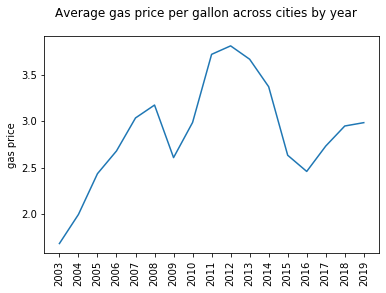

In [16]:
fig, ax = plt.subplots()
ax.plot(list(yeargas_dict.keys()), list(yeargas_dict.values()))
ax.set_ylabel('gas price')
plt.xticks(rotation=90)
fig.suptitle('Average gas price per gallon across cities by year')
plt.show()

In [17]:
def dual_plot_from_dict(d1, d2, title):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(list(d1.keys()), list(d1.values()), 'b-')
    ax1.set_ylabel('unlinked passenger trips', color = 'b')
    plt.xticks(rotation=45)
    
    ax2 = ax1.twinx()
    ax2.plot(list(d2.keys()), list(d2.values()), 'r-')
    ax2.set_ylabel('gas price', color='r')
    fig.suptitle(title)
 
    plt.show()

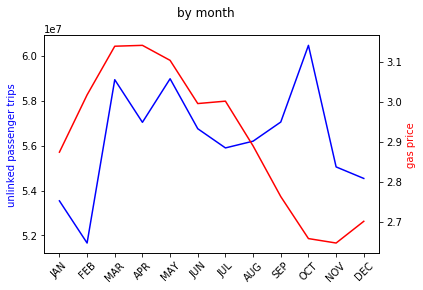

In [18]:
dual_plot_from_dict(monthtrip_dict, monthgas_dict, 'by month')

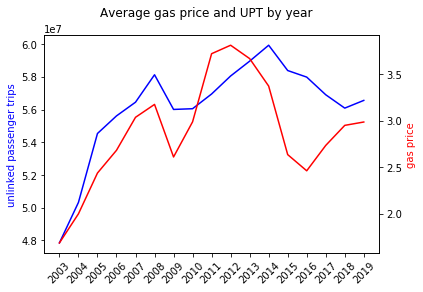

In [19]:
dual_plot_from_dict(yeartrip_dict, yeargas_dict, 'Average gas price and UPT by year')

In [20]:
pop_df = pd.read_csv('full_data.csv', thousands=',')
pop_df = pop_df[['Total Population', 'city', 'trips']]

pop_df['trip_pc'] = pop_df['trips']/pop_df['Total Population']

cities = list(set(x for x in pop_df['city'].values))
citytrips = dict.fromkeys(cities, None)
for c in citytrips:
    cit_df = pop_df[pop_df['city']==c]
    avg_trips = np.mean(np.asarray(cit_df['trip_pc']))
    citytrips[c]= avg_trips
    
citytrips


{'LA': 14.041585993381409,
 'Boston': 51.152208332621434,
 'NYC': 41.42560906644529,
 'Chicago': 19.114015508753926,
 'Seattle': 25.822887699987756,
 'Houston': 3.4040074931616675,
 'Cleveland': 10.566605608500755,
 'Miami': 32.30870323582373,
 'Denver': 12.98543671370704,
 'San Francisco': 44.63377062267086}

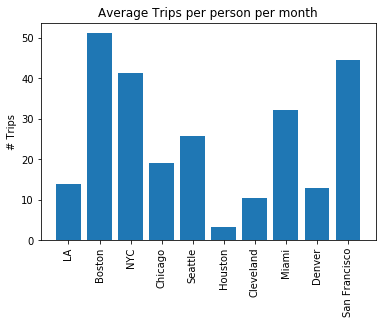

In [21]:
plt.bar(citytrips.keys(), citytrips.values())
plt.xticks(rotation=90)
plt.title('Average Trips per person per month')
plt.ylabel('# Trips')
plt.savefig('avgcitytrips.png')
plt.show()

In [22]:
x = list(range(197))

In [23]:
def dual_plot(trips, gprice, label):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x, trips[x], 'b-')
    ax1.set_ylabel('unlinked passenger trips', color = 'b')

    ax2 = ax1.twinx()
    ax2.plot(x, gprice[x], 'r-')
    ax2.set_ylabel('gas price', color='r')
    fig.suptitle(label)
    name = label+'.png'
    fig.savefig(name)
    plt.show()

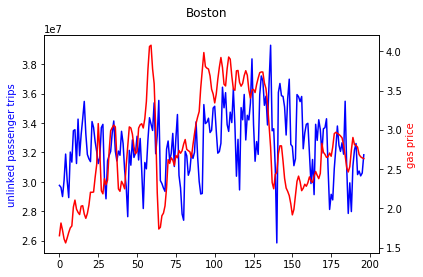

In [24]:
dual_plot(mdict['Boston'][0], mdict['Boston'][1], 'Boston')

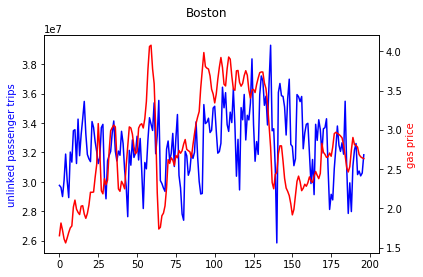

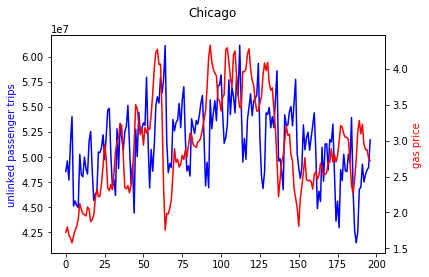

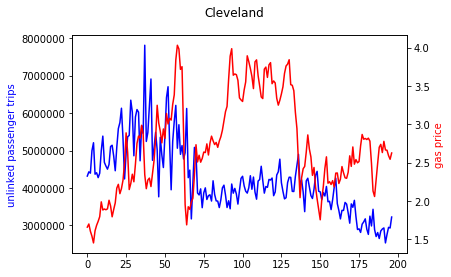

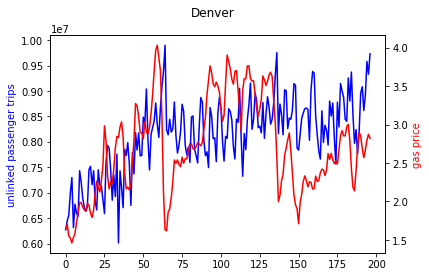

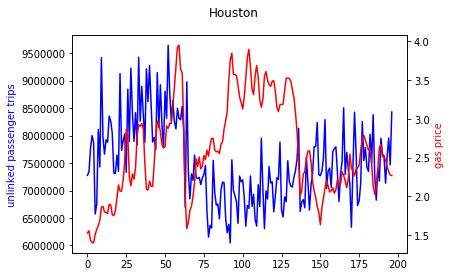

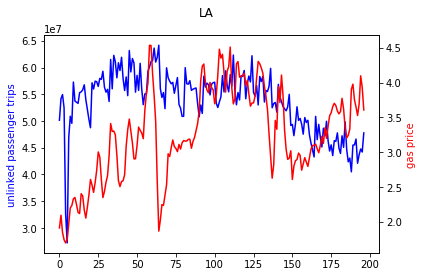

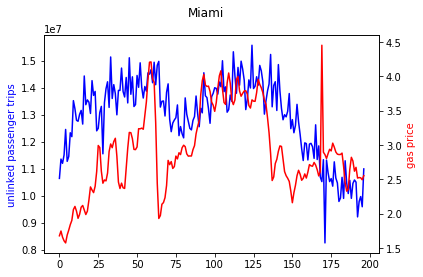

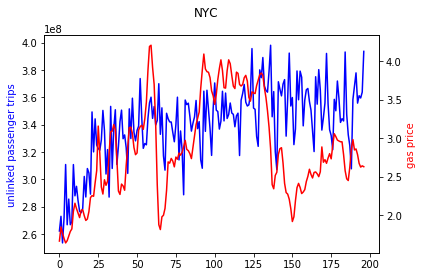

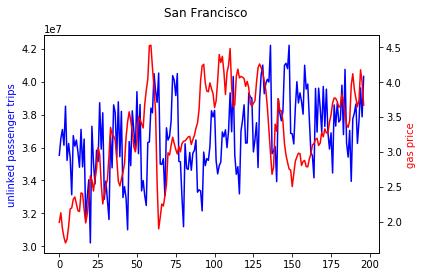

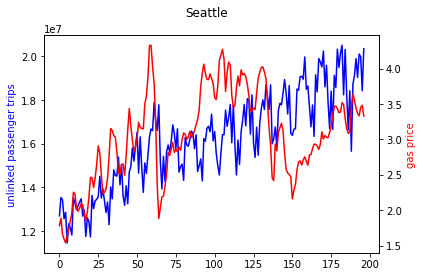

In [25]:
for k,v in mdict.items():
    dual_plot(v[0], v[1], k)